# Lecture 18: Data Visualization in Python 

## Exercise 1

### Background

You've conducted a kinetics study measuring the concentration of a reactant over time at three different temperatures (298 K, 308 K, and 318 K). You need to visualize this data effectively to communicate your findings.

### Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate kinetics data
time = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])  # minutes

# Concentration data (M) with experimental uncertainty
conc_298K = np.array([1.00, 0.85, 0.72, 0.61, 0.52, 0.44, 0.37, 0.32, 0.27, 0.23, 0.19])
conc_308K = np.array([1.00, 0.78, 0.61, 0.48, 0.37, 0.29, 0.23, 0.18, 0.14, 0.11, 0.09])
conc_318K = np.array([1.00, 0.70, 0.49, 0.34, 0.24, 0.17, 0.12, 0.08, 0.06, 0.04, 0.03])

# Experimental uncertainty (±0.02 M)
uncertainty = 0.02

# Create DataFrame
df = pd.DataFrame({
    'Time (min)': np.tile(time, 3),
    'Concentration (M)': np.concatenate([conc_298K, conc_308K, conc_318K]),
    'Temperature (K)': np.repeat([298, 308, 318], len(time)),
    'Uncertainty': uncertainty
})

### Instructions 

### Part A: Appropriate Plot Selection (20 minutes)

Create three different visualizations of the same kinetics data:

- A line plot showing concentration vs. time for all three temperatures
- A scatter plot with the same data
- A bar plot with the same data


Analysis: Think about how you would explain each of the different plots:

- Which plot type is most appropriate for this kinetics data and why?
- What are the advantages and disadvantages of each approach?
- When might you use each type of plot in chemistry?


Best Practices: Create a publication-quality version of the most appropriate plot including:

- Proper axis labels with units
- A clear legend

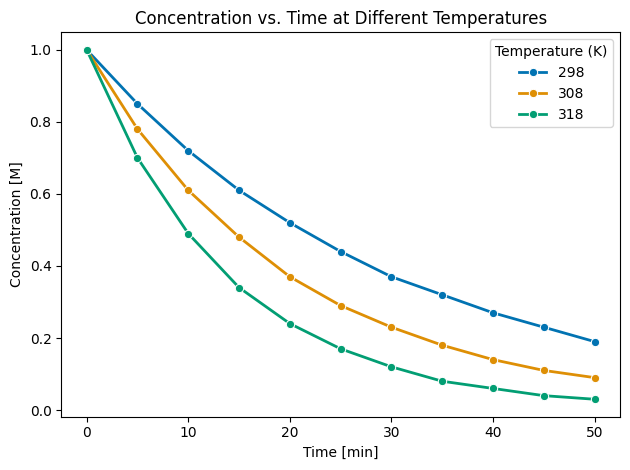

In [2]:
sns.lineplot(data=df, x="Time (min)", y="Concentration (M)", marker="o", hue="Temperature (K)", palette="colorblind", estimator="mean", lw=2)
plt.xscale("linear")
plt.ylabel("Concentration [M]")
plt.xlabel("Time [min]")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()
plt.show()


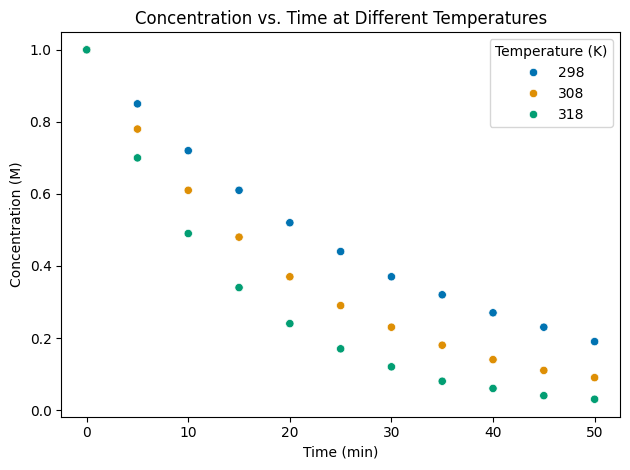

In [3]:
sns.scatterplot(data=df, x="Time (min)", y="Concentration (M)", hue="Temperature (K)", palette="colorblind")
plt.xscale("linear")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (min)")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()
plt.show()

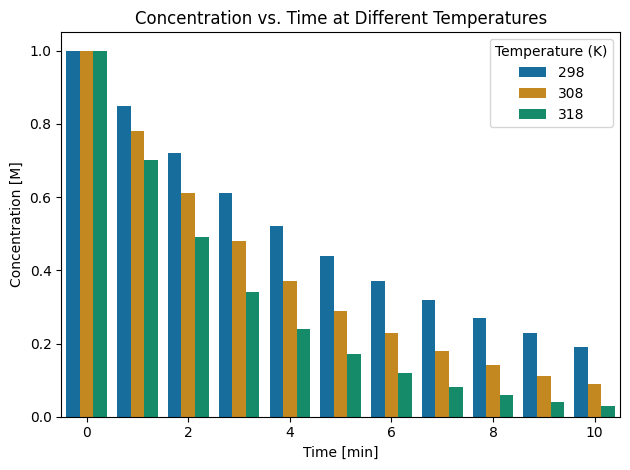

In [4]:
sns.barplot(data=df, x="Time (min)", y="Concentration (M)", hue="Temperature (K)", palette="colorblind")
plt.xscale("linear")
plt.ylabel("Concentration [M]")
plt.xlabel("Time [min]")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()
plt.show()

### Answers to questions:

#### Most appropriate: Line plot.

Kinetics experiments follow concentration continuously over time. A line plot:
- Emphasizes the trend (exponential decay in this case)
- Allows easy comparison between temperatures
- Shows noise smoothly without exaggeration
- Is standard for chemical kinetics (first-order, second-order, etc.)

#### Advantages&Disavantages of each plot type

1. Line Plot

Advantages:
- Clearly shows the reaction trend
- Excellent for comparing temperatures
- Smoothly visualizes kinetic decay
- Readable and familiar in kinetics papers

Disadvantages:
- Can imply continuous measurement even if data are sparse


2. Scatter Plot

Advantages:
- Shows individual data points explicitly
- Useful when emphasizing experimental uncertainty or noise

Disadvantages:
- Trends are less visually clear compared to line plots
- Harder to compare multiple datasets


3. Bar Plot

Advantages:
- Useful for comparing categories (but time is NOT categorical in kinetics)

Disadvantages:
- Hides trends
- Visually cluttered with many time points
- Misleading for continuous data


#### Publication ready figure

...includes errorbars, proper labels, good figure size and appropriate colours, potentially also grid for readability

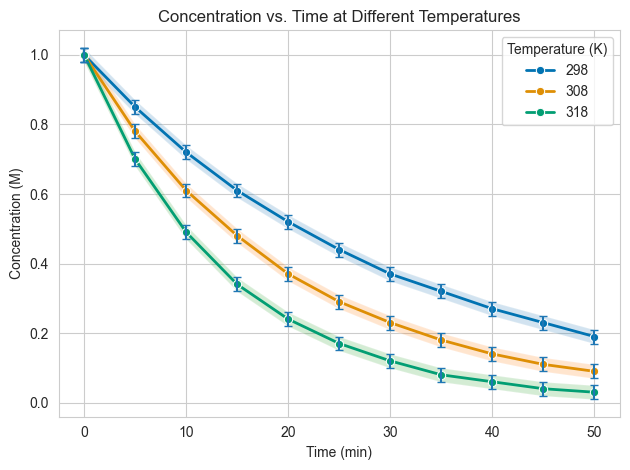

In [5]:
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Time (min)", y="Concentration (M)",
             marker="o",
             hue="Temperature (K)",
             palette="colorblind",
             errorbar=None,
             estimator="mean",
             lw=2)
plt.xscale("linear")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (min)")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()

# Use matplotlib error bars to portray uncertainty:
plt.errorbar(df["Time (min)"], df["Concentration (M)"], yerr=df["Uncertainty"], fmt="none", capsize=3)

# Portraying errorbars as shaded band:
for name, g in df.groupby("Temperature (K)"):
    g = g.sort_values("Time (min)")
    lower = g["Concentration (M)"] - g["Uncertainty"]
    upper = g["Concentration (M)"] + g["Uncertainty"]
    plt.fill_between(g["Time (min)"], lower, upper, alpha=0.2)

plt.show()

### Part B: Different Colour palettes

Create four versions of your kinetics line plot using different color palettes:

- Default matplotlib colors
- A seaborn color palette of your choice
- A colorblind-friendly palette (e.g., 'colorblind' or 'Set2')
- A grayscale palette (for black & white printing)

Compare and think about:

- Which palette provides the best contrast and readability?
- Which would work best for colorblind readers?
- Which is most suitable for print publications?


Code hint:


```python
# Example for setting seaborn palette
sns.set_palette("husl")
# or
colors = sns.color_palette("colorblind", 3)
```

In [6]:
# define various colour palettes:
colours1 = sns.color_palette("viridis", 3)
colours2 = sns.color_palette("colorblind", 3)
colours3 = sns.color_palette("Greys", 3)

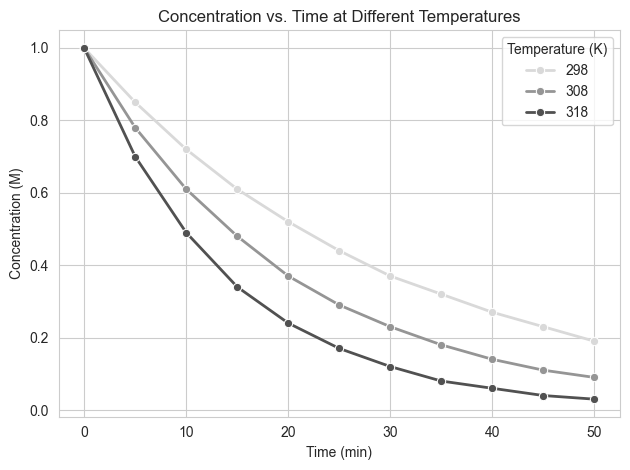

In [7]:
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Time (min)", y="Concentration (M)",
             marker="o",
             hue="Temperature (K)",
             palette=colours3, # use different predefined palettes
             errorbar=None,
             estimator="mean",
             lw=2)
plt.xscale("linear")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (min)")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()

### Part C: Error Bars and Uncertainty

Improve your best plot with proper error bars:

- Add error bars (±0.02 M) to all data points
- Adjust the error bar style (transparency, cap size) for readability
- Consider whether error bars on every point are necessary or if every nth point would be clearer

Experiment with different error bar styles:

- Standard error bars with caps
- Error bars without caps
- Shaded confidence regions (use plt.fill_between())

Which error representation method is clearest for this dataset? Why might you choose one over another?

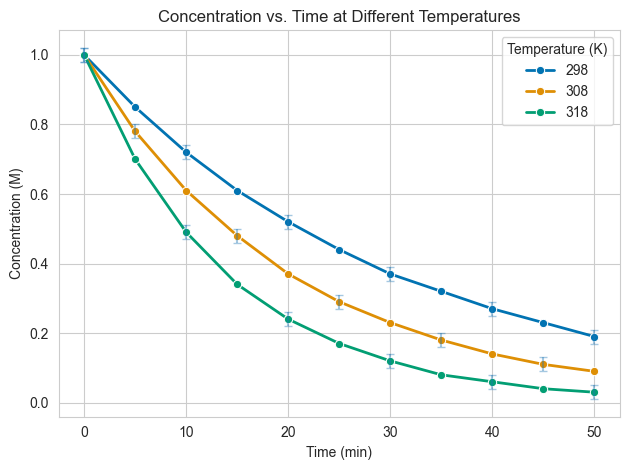

In [8]:
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Time (min)", y="Concentration (M)",
             marker="o",
             hue="Temperature (K)",
             palette="colorblind",
             errorbar=None,
             estimator="mean",
             lw=2)
plt.xscale("linear")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (min)")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()

# Use matplotlib error bars to portray uncertainty:
sampling_size = 2 # use different setp sizes between errorbars. This is written out for entire dataframe, else, groupby could be used as well.
plt.errorbar(df["Time (min)"].iloc[::sampling_size], df["Concentration (M)"].iloc[::sampling_size], yerr=df["Uncertainty"].iloc[::sampling_size], fmt="none", capsize=3, alpha=0.4)

# Portraying errorbars as shaded band:
# for name, g in df.groupby("Temperature (K)"):
#     g = g.sort_values("Time (min)")
#     lower = g["Concentration (M)"] - g["Uncertainty"]
#     upper = g["Concentration (M)"] + g["Uncertainty"]
#     plt.fill_between(g["Time (min)"], lower, upper, alpha=0.2)

plt.show()

### Part D: Saving High-Quality Figures

Save your final figure in multiple formats:

- PNG at 300 DPI (for presentations)
- PDF (for publications)
- SVG (for vector editing in e.g. Adobe Illustrator or Inkscape)


Code template:

```python
plt.savefig('kinetics_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('kinetics_plot.pdf', bbox_inches='tight')
plt.savefig('kinetics_plot.svg', bbox_inches='tight')
```

Compare file sizes and quality: Open each file and note the differences in file size and image quality.



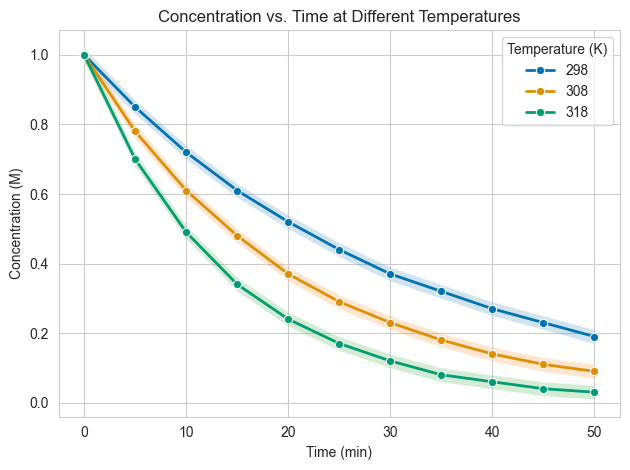

In [9]:
# make sure to save the figure before showing the plot!!
sns.set_style("whitegrid")

sns.lineplot(data=df, x="Time (min)", y="Concentration (M)",
             marker="o",
             hue="Temperature (K)",
             palette="colorblind",
             errorbar=None,
             estimator="mean",
             lw=2)
plt.xscale("linear")
plt.ylabel("Concentration (M)")
plt.xlabel("Time (min)")
plt.title("Concentration vs. Time at Different Temperatures")
plt.legend(title="Temperature (K)")
plt.tight_layout()

# Portraying errorbars as shaded band:
for name, g in df.groupby("Temperature (K)"):
    g = g.sort_values("Time (min)")
    lower = g["Concentration (M)"] - g["Uncertainty"]
    upper = g["Concentration (M)"] + g["Uncertainty"]
    plt.fill_between(g["Time (min)"], lower, upper, alpha=0.2)
plt.savefig("kinetics_plot.png", dpi=300, bbox_inches="tight")
plt.show()

## Exercise 2:

### Background

You've collected UV-Vis absorbance spectra for a series of compounds and need to create different visualizations to explore the data from various perspectives.

### Dataset

In [10]:
# UV-Vis spectroscopy data
wavelengths = np.arange(200, 501, 5)  # 200-500 nm

# Generate spectra for 4 different compounds
np.random.seed(42)
compounds = {
    'Compound A': np.exp(-((wavelengths-280)/30)**2) * 1.2 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound B': np.exp(-((wavelengths-320)/40)**2) * 0.9 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound C': np.exp(-((wavelengths-260)/25)**2) * 1.5 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound D': np.exp(-((wavelengths-350)/35)**2) * 0.7 + np.random.normal(0, 0.02, len(wavelengths))
}

# Lambda max values for each compound
lambda_max = {'A': 280, 'B': 320, 'C': 260, 'D': 350}
max_absorbance = {'A': 1.2, 'B': 0.9, 'C': 1.5, 'D': 0.7}

# Concentration series for Beer's Law
concentrations = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])  # μM
absorbances = concentrations * 0.42  # ε = 42000 M⁻¹cm⁻¹
abs_errors = np.array([0, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04])

### Instructions

### Part A: Line Plots for Spectroscopy

Create a multi-line plot showing all four UV-Vis spectra on the same axes

Customize the plot:

- Use different line styles (solid, dashed, dotted) in addition to colors
- Add vertical lines indicating λ_max for each compound
- Annotate the λ_max values on the plot
- Set appropriate axis limits to focus on the region of interest

Create a subplot figure showing each spectrum individually in a 2×2 grid

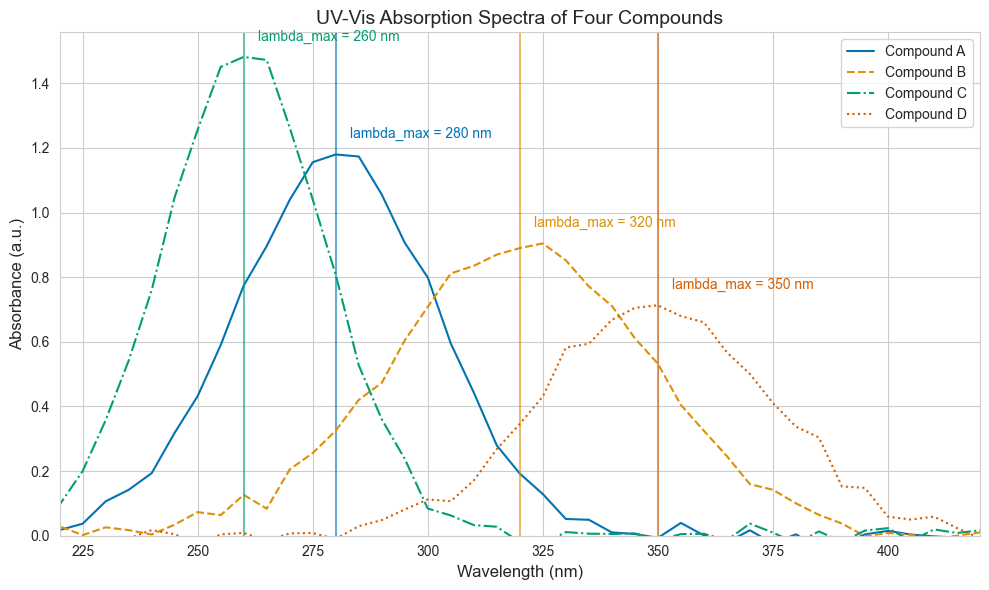

In [11]:
# alternative to the following would be to melt the df into a long table and then use seaborn...

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Define custom line styles for variety
line_styles = ['-', '--', '-.', ':']
colors = sns.color_palette("colorblind", 4)

for (i, compound) in enumerate(compounds.keys()):
    plt.plot(
        wavelengths,
        compounds[compound],
        label=compound,
        linestyle=line_styles[i % len(line_styles)],
        color=colors[i]
    )

    # Add lambda_max line
    lam = lambda_max[compound.split()[-1]]  # uses dict A/B/C/D
    plt.axvline(lam, color=colors[i], alpha=0.6)

    # Annotate lambda_max
    plt.text(
        lam + 3,
        0.05 + max(compounds[compound]),  # slightly above peak
        f"lambda_max = {lam} nm",
        color=colors[i],
        fontsize=10
    )

plt.title("UV-Vis Absorption Spectra of Four Compounds", fontsize=14)
plt.xlabel("Wavelength (nm)", fontsize=12)
plt.ylabel("Absorbance (a.u.)", fontsize=12)

# Zoom in to region of interest
plt.xlim(220, 420)
plt.ylim(0, None)

plt.legend()
plt.tight_layout()
plt.show()


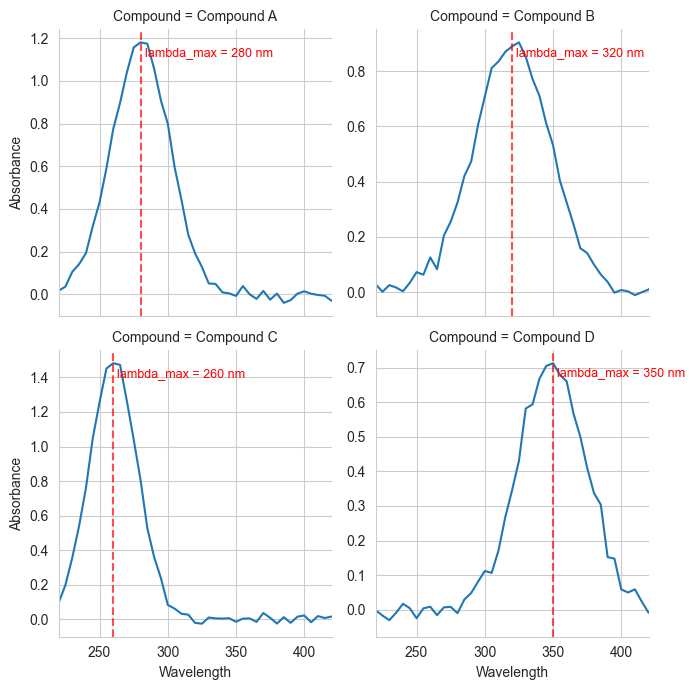

In [12]:
# Build DataFrame for Seaborn - melt into long table

df_uv = pd.DataFrame({
    "Wavelength": wavelengths
})

for compound in compounds:
    df_uv[compound] = compounds[compound]

df_uv = df_uv.melt(id_vars="Wavelength", 
                   var_name="Compound", 
                   value_name="Absorbance")

# plot as facetgrid
g = sns.FacetGrid(
    df_uv,
    col="Compound",
    col_wrap=2,
    height=3.5,
    sharey=False
)

g.map_dataframe(sns.lineplot, x="Wavelength", y="Absorbance")

# Add lambda_max line + annotation for each subplot
for ax, compound in zip(g.axes.flatten(), df_uv["Compound"].unique()):
    key = compound.split()[-1]  # A, B, C, D
    lam = lambda_max[key]

    ax.axvline(lam, color="red", linestyle="--", alpha=0.7)
    ax.text(
        lam + 3,
        0.9 * ax.get_ylim()[1],
        f"lambda_max = {lam} nm",
        fontsize=9,
        color="red"
    )
    ax.set_xlim(220, 420)

plt.tight_layout()
plt.show()


### Part B: Scatter Plots and Linear Regression (15 minutes)

Create a Beer's Law calibration curve:

- Scatter plot of absorbance vs. concentration
- Add error bars to absorbance measurements
- Fit and overlay a linear regression line
- Display the equation and R² value on the plot

Code hint for regression:

```python
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(concentrations, absorbances)
```

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Concentration and absorbance series
concentrations = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])  # μM
absorbances = concentrations * 0.42  # ε = 42000 M⁻¹cm⁻¹
abs_errors = np.array([0, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04])

# Create DataFrame
df_beer = pd.DataFrame({
    "Concentration (μM)": concentrations,
    "Absorbance": absorbances,
    "Error": abs_errors
})

In [14]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df_beer["Concentration (μM)"], df_beer["Absorbance"]
)

# R² value
r_squared = r_value**2

# Predicted values for plotting the regression line
x_fit = np.linspace(df_beer["Concentration (μM)"].min(), df_beer["Concentration (μM)"].max(), 100)
y_fit = slope * x_fit + intercept


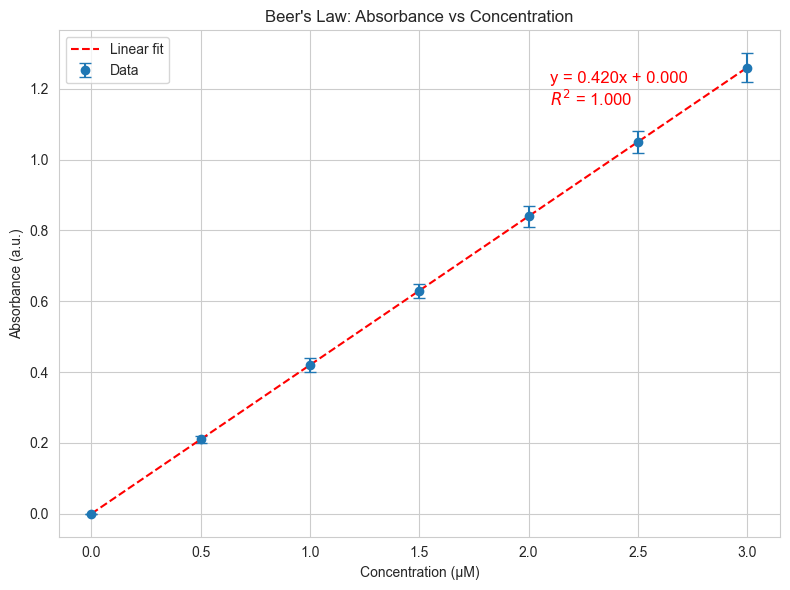

In [15]:
plt.figure(figsize=(8,6))

# Scatter plot with error bars
plt.errorbar(
    df_beer["Concentration (μM)"],
    df_beer["Absorbance"],
    yerr=df_beer["Error"],
    fmt='o',
    capsize=4,
    label='Data'
)

# Regression line
plt.plot(x_fit, y_fit, 'r--', label='Linear fit')

# Display equation and R² on plot
plt.text(
    2.1, 1.15, #x,y coordinates
    f"y = {slope:.3f}x + {intercept:.3f}\n$R^2$ = {r_squared:.3f}",
    color='red',
    fontsize=12
)

plt.xlabel("Concentration (μM)")
plt.ylabel("Absorbance (a.u.)")
plt.title("Beer's Law: Absorbance vs Concentration")
plt.legend()
plt.tight_layout()
plt.show()


### Part C: Bar Charts for Comparisons

Create a bar chart comparing the maximum absorbance values of all four compounds

- Include error bars (assume ±5% error)
- Use different colors for each compound
- Add value labels on top of each bar


Create a grouped bar chart showing two properties:

- λ_max values (use secondary y-axis)
- Maximum absorbance values (primary y-axis)

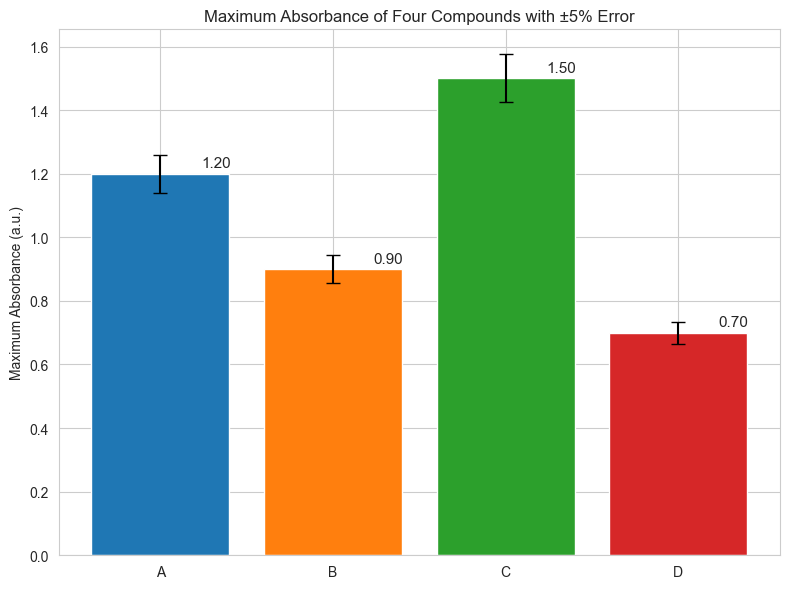

In [16]:
# Prepare data
compounds_list = ['A', 'B', 'C', 'D']
max_abs_values = [max_absorbance[c] for c in compounds_list]
max_abs_errors = [0.05 * val for val in max_abs_values]  # ±5% error

# Plot
plt.figure(figsize=(8,6))
colors = sns.color_palette("tab10", len(compounds_list))

bars = plt.bar(compounds_list, max_abs_values, yerr=max_abs_errors, color=colors, capsize=5)

# Add value labels on top of each bar
for bar, val in zip(bars, max_abs_values):
    plt.text(bar.get_x() + bar.get_width()*0.9, val + 0.02, f"{val:.2f}", ha='center', fontsize=11)

plt.ylabel("Maximum Absorbance (a.u.)")
plt.title("Maximum Absorbance of Four Compounds with ±5% Error")
plt.tight_layout()
plt.show()


C:\Users\jschoer\AppData\Local\Temp\ipykernel_34288\3466569082.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(np.round(ax2.get_yticks()/scale,1))


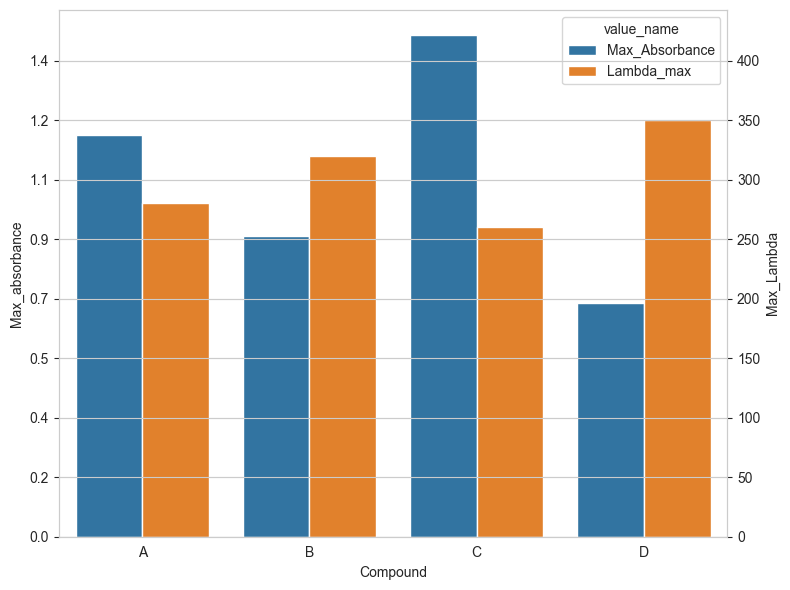

In [ ]:
#create grouped bar chart
# Prepare data
compounds_list = ['A', 'B', 'C', 'D']
max_abs_values = [max_absorbance[c] for c in compounds_list]
max_lambda_values = [lambda_max[c] for c in compounds_list]

df_bar = pd.DataFrame({
    "Compound": compounds_list,
    "Max_Absorbance": max_abs_values,
    "Lambda_max": max_lambda_values,
})

# Melt dataframe to longtable
df_melted = pd.melt(df_bar, id_vars="Compound", var_name="value_name", value_name="value_numbers")
# print(df_melted)

# Scale the absorbance values to the same order of magnitude as the wavelength (otherwise invisibly small bars if put to same scale)
mask = df_melted.value_name.isin(["Max_Absorbance"])
scale = int(df_melted[~mask].value_numbers.mean()/df_melted[mask].value_numbers.mean())
df_melted.loc[mask, 'value_numbers'] = df_melted.loc[mask, 'value_numbers']*scale

# print(df_melted)

# Plot
fig, ax1 = plt.subplots(figsize=(8,6))

# primary plot (absorbance)
g1 = sns.barplot(
    x="Compound",
    y="value_numbers",
    data=df_melted,
    hue="value_name",
    capsize=0.1,
    ax=ax1
)

# create second y axis
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax1.set_yticklabels(np.round(ax2.get_yticks()/scale,1))
ax1.set_ylabel("Max_absorbance")
ax2.set_ylabel('Max_Lambda')

plt.tight_layout()
plt.show()



### Part D: Distribution Plots 

Generate replicate measurements for compound A:

```python
# Simulate 50 replicate measurements at λ_max
replicates_A = np.random.normal(1.2, 0.05, 50)
replicates_B = np.random.normal(0.9, 0.04, 50)
replicates_C = np.random.normal(1.5, 0.06, 50)
replicates_D = np.random.normal(0.7, 0.03, 50)
```

Create multiple distribution visualizations:

- Histogram with KDE (kernel density estimate) overlay for compound A (hint: Have a look at seaborn's histogram plot)
- Violin plots comparing all four compounds
- Box plots comparing all four compounds side-by-side


Which distribution plot type best shows:

- The spread of data?
- The presence of outliers?
- The comparison between multiple groups?


In [46]:
# Simulate 50 replicate measurements
np.random.seed(42)
replicates_A = np.random.normal(1.2, 0.05, 50)
replicates_B = np.random.normal(0.9, 0.04, 50)
replicates_C = np.random.normal(1.5, 0.06, 50)
replicates_D = np.random.normal(0.7, 0.03, 50)

# Combine into tidy DataFrame
df_replicates = pd.DataFrame({
    "Compound": ["A"]*50 + ["B"]*50 + ["C"]*50 + ["D"]*50,
    "Absorbance": np.concatenate([replicates_A, replicates_B, replicates_C, replicates_D])
})


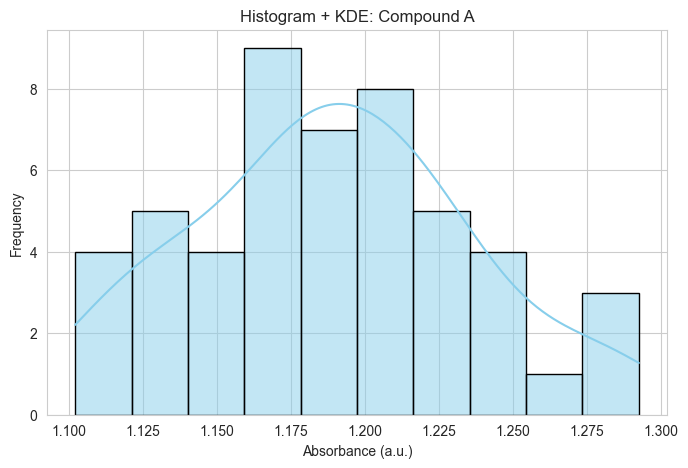

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df_replicates[df_replicates["Compound"]=="A"]["Absorbance"],
             bins=10, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Absorbance (a.u.)")
plt.ylabel("Frequency")
plt.title("Histogram + KDE: Compound A")
plt.show()


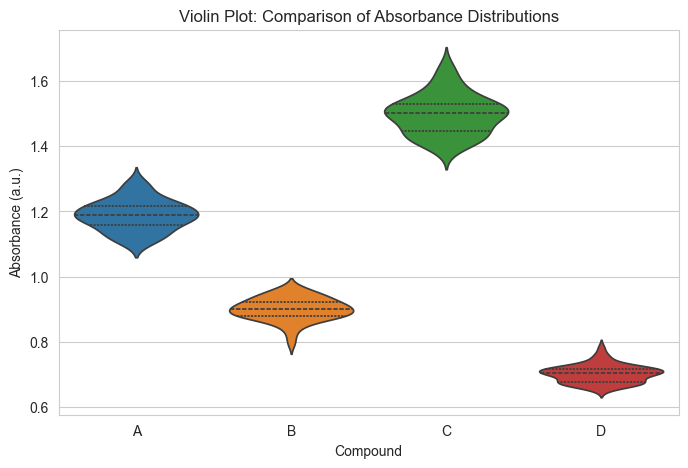

In [48]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Compound", y="Absorbance", data=df_replicates,
               palette="tab10", hue="Compound", inner="quartile")
plt.xlabel("Compound")
plt.ylabel("Absorbance (a.u.)")
plt.title("Violin Plot: Comparison of Absorbance Distributions")
plt.show()


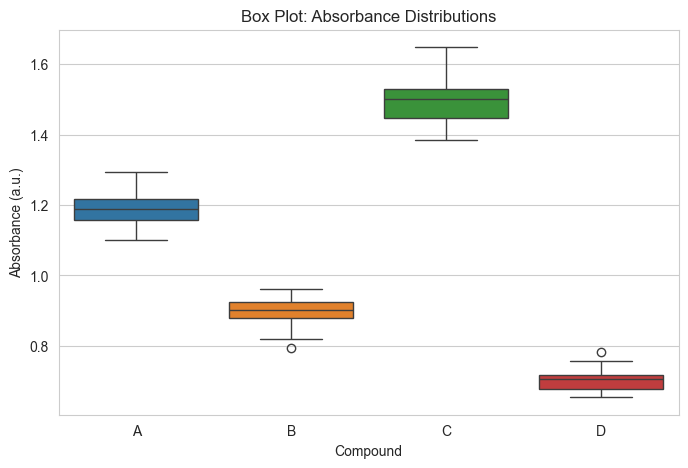

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Compound", y="Absorbance", data=df_replicates,
            palette="tab10", hue="Compound")
plt.xlabel("Compound")
plt.ylabel("Absorbance (a.u.)")
plt.title("Box Plot: Absorbance Distributions")
plt.show()


Show spread of data:
Violin plot: Combines density, quartiles, and spread visually
Histogram (slightly less information): Distribution more nicely shown

Identify outliers
Box plot: Explicitly shows whiskers and extreme points

Compare multiple groups:
Both allow side-by-side group comparisons; violin also shows distribution shape

### Part E: Multi-Panel Figure

Create a publication-ready multi-panel figure combining:

- Panel A: All UV-Vis spectra (line plot)
- Panel B: Beer's Law calibration curve (scatter + line)
- Panel C: Maximum absorbance comparison (bar chart)
- Panel D: Distribution of replicates (violin plot)

Requirements:

- Use plt.subplot() or fig.add_subplot() to create a 2×2 layout
- Add panel labels (A, B, C, D) to each subplot
- Ensure consistent styling across all panels
- Use a coherent color scheme throughout
- Save as a high-quality figure (300 DPI, PDF format)

Code hint:

```python
fig = plt.figure(figsize=(12, 10))

# Panel A
ax1 = fig.add_subplot(2, 2, 1)
# ... your plotting code ...
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold')

# Repeat for other panels...
```

C:\Users\jschoer\AppData\Local\Temp\ipykernel_34288\2232412138.py:63: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=df_uv, x="Wavelength", y="Absorbance", hue="Compound",
C:\Users\jschoer\AppData\Local\Temp\ipykernel_34288\2232412138.py:96: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.violinplot(x="Compound", y="Absorbance", data=df_replicates,


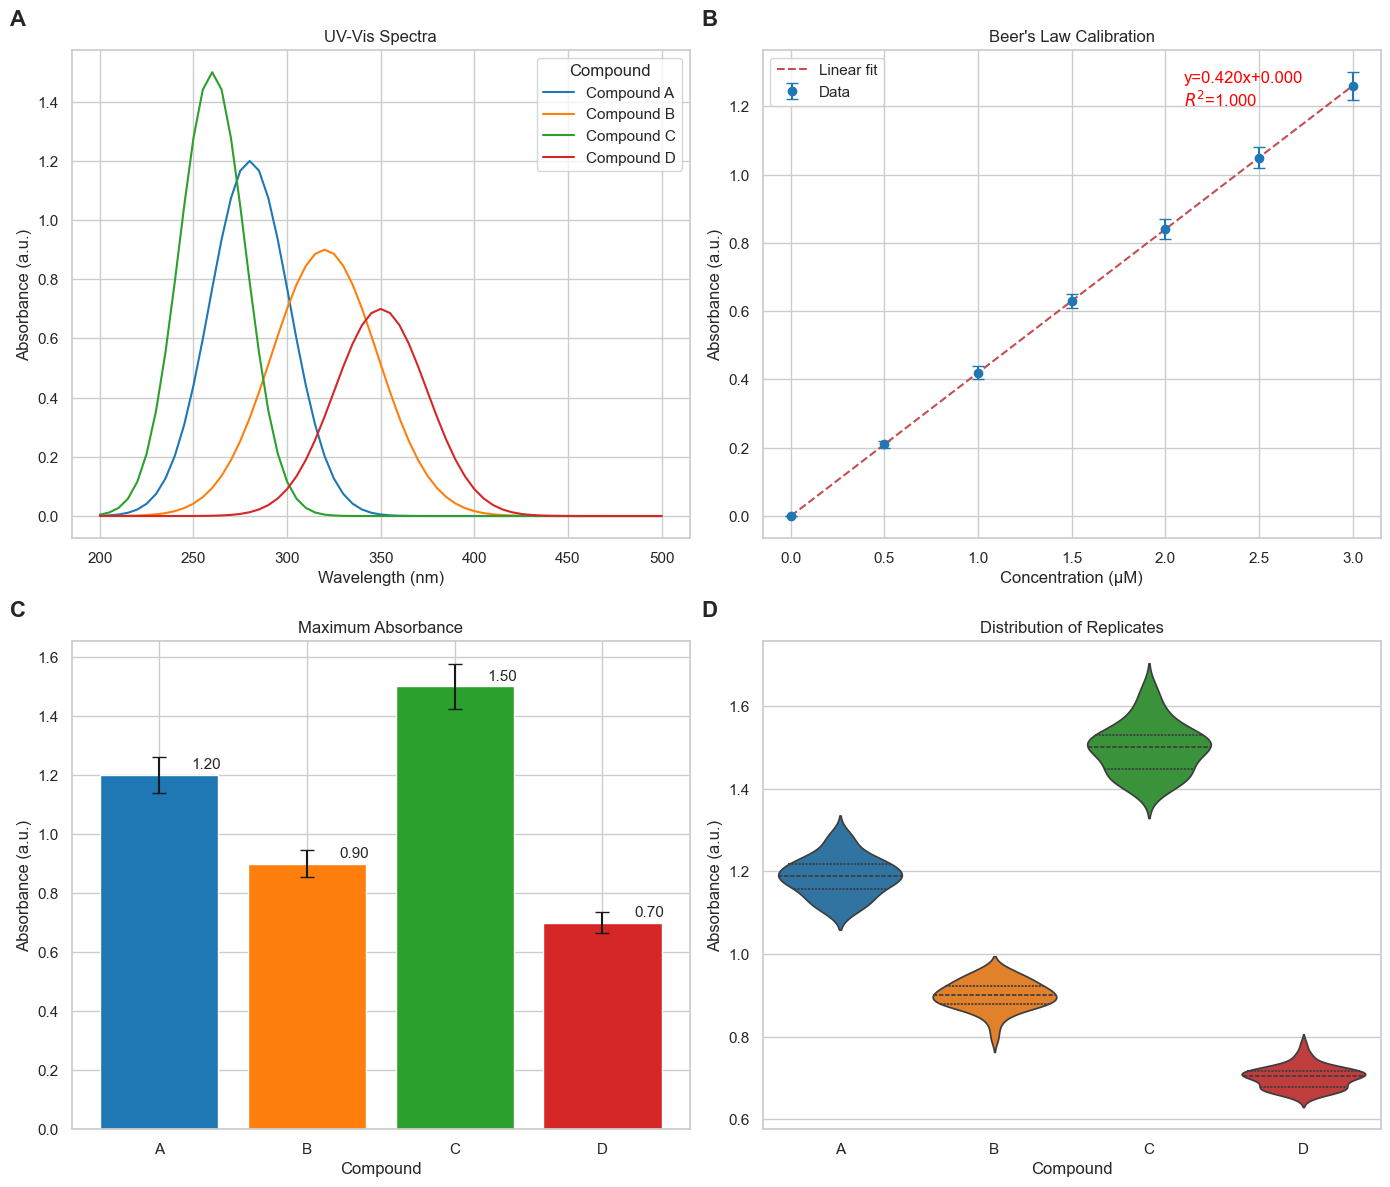

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

palette = sns.color_palette("tab10")  # coherent color scheme

# ----- Panel A: UV-Vis spectra -----
# Convert UV-Vis spectra to tidy DataFrame
wavelengths = np.arange(200, 501, 5)
compounds_dict = {
    'Compound A': np.exp(-((wavelengths-280)/30)**2) * 1.2,
    'Compound B': np.exp(-((wavelengths-320)/40)**2) * 0.9,
    'Compound C': np.exp(-((wavelengths-260)/25)**2) * 1.5,
    'Compound D': np.exp(-((wavelengths-350)/35)**2) * 0.7
}

df_uv = pd.DataFrame({'Wavelength': wavelengths})
for comp, values in compounds_dict.items():
    df_uv[comp] = values
df_uv = df_uv.melt(id_vars="Wavelength", var_name="Compound", value_name="Absorbance")

# ----- Panel B: Beer's Law -----
concentrations = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
absorbances = concentrations * 0.42
abs_errors = np.array([0, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04])
df_beer = pd.DataFrame({
    "Concentration": concentrations,
    "Absorbance": absorbances,
    "Error": abs_errors
})

# Linear fit
slope, intercept = np.polyfit(df_beer["Concentration"], df_beer["Absorbance"], 1)
x_fit = np.linspace(df_beer["Concentration"].min(), df_beer["Concentration"].max(), 100)
y_fit = slope*x_fit + intercept
ss_res = np.sum((df_beer["Absorbance"] - (slope*df_beer["Concentration"]+intercept))**2)
ss_tot = np.sum((df_beer["Absorbance"] - np.mean(df_beer["Absorbance"]))**2)
r_squared = 1 - ss_res/ss_tot

# ----- Panel C: Max absorbance bar chart -----
compounds_list = ['A', 'B', 'C', 'D']
max_absorbance = {'A': 1.2, 'B': 0.9, 'C': 1.5, 'D': 0.7}
max_abs_values = [max_absorbance[c] for c in compounds_list]
max_abs_errors = [0.05*val for val in max_abs_values]  # ±5% error

# ----- Panel D: Violin plot of replicates -----
np.random.seed(42)
replicates_A = np.random.normal(1.2, 0.05, 50)
replicates_B = np.random.normal(0.9, 0.04, 50)
replicates_C = np.random.normal(1.5, 0.06, 50)
replicates_D = np.random.normal(0.7, 0.03, 50)
df_replicates = pd.DataFrame({
    "Compound": ["A"]*50 + ["B"]*50 + ["C"]*50 + ["D"]*50,
    "Absorbance": np.concatenate([replicates_A, replicates_B, replicates_C, replicates_D])
})

# ----- Create figure and subplots -----
fig = plt.figure(figsize=(14, 12))

# Panel A: UV-Vis spectra
ax1 = fig.add_subplot(2,2,1)
sns.lineplot(data=df_uv, x="Wavelength", y="Absorbance", hue="Compound",
             palette=palette, ax=ax1)
ax1.set_title("UV-Vis Spectra")
ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Absorbance (a.u.)")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax1.legend(title='Compound')

# Panel B: Beer's Law calibration curve
ax2 = fig.add_subplot(2,2,2)
ax2.errorbar(df_beer["Concentration"], df_beer["Absorbance"], yerr=df_beer["Error"],
             fmt='o', capsize=4, color=palette[0], label='Data')
ax2.plot(x_fit, y_fit, 'r--', label='Linear fit')
ax2.text(2.1, 1.2, f'y={slope:.3f}x+{intercept:.3f}\n$R^2$={r_squared:.3f}',
         color='red', fontsize=12)
ax2.set_title("Beer's Law Calibration")
ax2.set_xlabel("Concentration (μM)")
ax2.set_ylabel("Absorbance (a.u.)")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold')
ax2.legend()

# Panel C: Max absorbance bar chart
ax3 = fig.add_subplot(2,2,3)
bars = ax3.bar(compounds_list, max_abs_values, yerr=max_abs_errors, color=palette, capsize=5)
ax3.set_title("Maximum Absorbance")
ax3.set_xlabel("Compound")
ax3.set_ylabel("Absorbance (a.u.)")
for bar, val in zip(bars, max_abs_values):
    ax3.text(bar.get_x() + bar.get_width()*0.9, val + 0.02, f"{val:.2f}", ha='center', fontsize=11)
ax3.text(-0.1, 1.05, 'C', transform=ax3.transAxes, fontsize=16, fontweight='bold')

# Panel D: Violin plot of replicates
ax4 = fig.add_subplot(2,2,4)
sns.violinplot(x="Compound", y="Absorbance", data=df_replicates,
               palette=palette, hue="Compound", inner="quartile", ax=ax4)
ax4.set_title("Distribution of Replicates")
ax4.set_xlabel("Compound")
ax4.set_ylabel("Absorbance (a.u.)")
ax4.text(-0.1, 1.05, 'D', transform=ax4.transAxes, fontsize=16, fontweight='bold')

plt.tight_layout()

# Save high-quality figure
plt.savefig("multi_panel_figure.pdf", dpi=300)
plt.show()
